This is a notebook to outline an experiment to ease handling of Components I/O when creating your Pipelines with Haystack.
Ideally it will ease discoverability of both input and output of ALL Components, no matter how they're defined.

This will also make it easier to call `Pipeline.connect()`.

This is obviously an exploration of possible enhancements, nothing is set in stone. It has its rought edges and space for improvement.

So first install Haystack.

In [ ]:
%pip install -e .

Let's take a random component and see its I/O.

In [3]:
from haystack.components.builders.dynamic_prompt_builder import DynamicPromptBuilder

builder = DynamicPromptBuilder()
print(builder.inputs)
print(builder.outputs)

Component Inputs:
    prompt_source: <class 'str'>
    template_variables: typing.Union[typing.Dict[str, typing.Any], NoneType]
Component Outputs:
    prompt: <class 'str'>


Cool, this just doesn't print a representation of the Component's I/O, it also enables code auto completion.
Try it in the cell below.

In [ ]:
# Write a . right after inputs to get the list of available inputs
builder.inputs
# Same for outputs
builder.outputs

But there's more, you can use this in `Pipeline.connect()`. 
Try to recreate the same connections shown in the comments, but using the Components instances.

In [2]:
from haystack import Pipeline
from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.components.retrievers.in_memory import InMemoryBM25Retriever
from haystack.components.generators import OpenAIGenerator
from haystack.components.builders.answer_builder import AnswerBuilder
from haystack.components.builders.prompt_builder import PromptBuilder

prompt_template = """
Given these documents, answer the question.\nDocuments:
{% for doc in documents %}
    {{ doc.content }}
{% endfor %}

\nQuestion: {{question}}
\nAnswer:
"""

retriever = InMemoryBM25Retriever(document_store=InMemoryDocumentStore())
prompt_builder = PromptBuilder(template=prompt_template)
llm = OpenAIGenerator(api_key="some_stupid_fake_key")
answer_builder = AnswerBuilder()

pipeline = Pipeline()
pipeline.add_component("retriever", retriever)
pipeline.add_component("prompt_builder", prompt_builder)
pipeline.add_component("llm", llm)
pipeline.add_component("answer_builder", answer_builder)
# pipeline.connect("retriever", "prompt_builder.documents")
# pipeline.connect("prompt_builder", "llm")
# pipeline.connect("llm.replies", "answer_builder.replies")
# pipeline.connect("llm.meta", "answer_builder.meta")
# pipeline.connect("retriever", "answer_builder.documents")

# Small suggestion ;)
pipeline.connect(retriever.outputs.documents, prompt_builder.inputs.documents)

Let's draw the Pipeline and see the connections.

/Users/silvanocerza/workspace/haystack


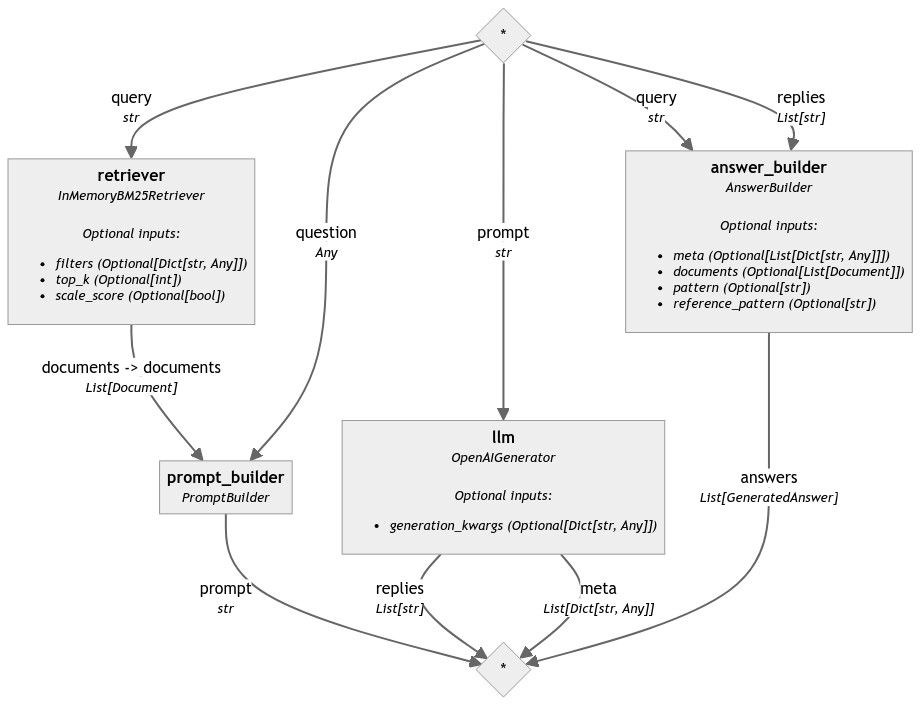

In [8]:
from IPython.display import Image
from pathlib import Path

image_path = Path(".") / "experimental_io_pipeline.png"
pipeline.draw(image_path)
Image(image_path)

Have you noticed a thing? 
We're not using the names of the Components anymore, just their instances. The names is only used when calling `Pipeline.add_component()`.

Potentially we can go even further than the example above and completely remove the `Pipeline.add_component()` method.
`Pipeline.connect()` will take care of adding and connecting the Components.

In this experiment it's not possible but there's potential for that.